In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Adding train and test

In [34]:
seniors=pd.read_csv('Seniors.csv')     #Reading Seniors file as Train Data
juniors=pd.read_csv('Juniors.csv')     #Reading Juniors file as Test Data
seniors_qr=seniors['Quality Rating']
seniors=seniors.drop(['Unnamed: 0'],axis=1)
seniors.head(10)


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


In [35]:
x1=seniors.drop(['Quality Rating'],axis=1)
y1=seniors['Quality Rating']

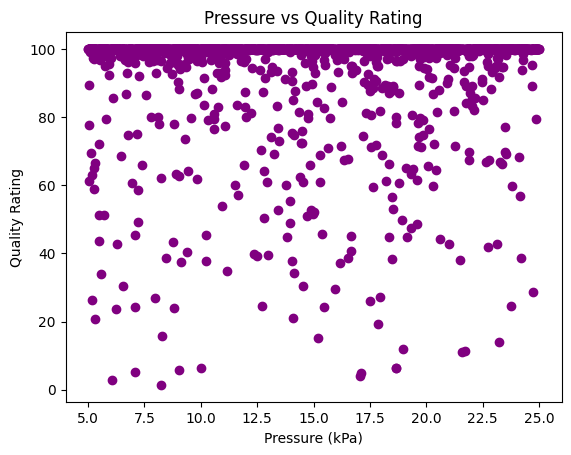

In [36]:
plt.scatter(seniors['Pressure (kPa)'],seniors['Quality Rating'],c='purple')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Quality Rating')
plt.title('Pressure vs Quality Rating')
plt.show()

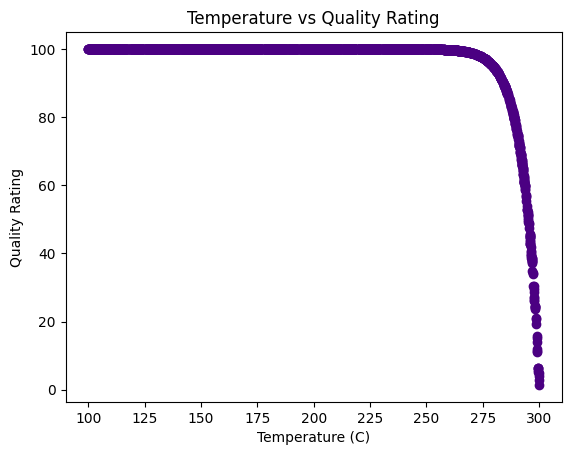

In [37]:
plt.scatter(seniors['Temperature (°C)'],seniors['Quality Rating'],c='indigo')
plt.xlabel('Temperature (C)')
plt.ylabel('Quality Rating')
plt.title('Temperature vs Quality Rating')
plt.show()

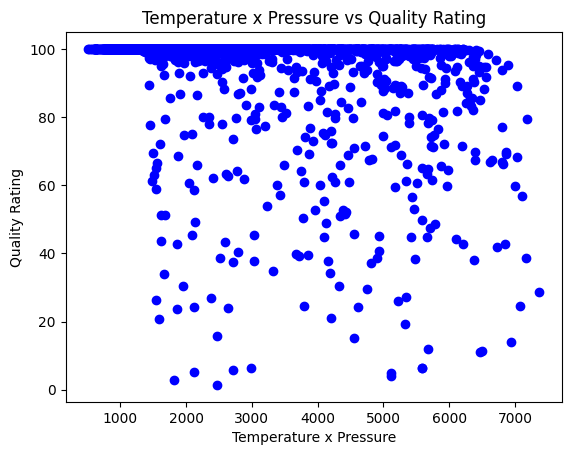

In [38]:
plt.scatter(seniors['Temperature x Pressure'],seniors['Quality Rating'],c='blue')
plt.xlabel('Temperature x Pressure')
plt.ylabel('Quality Rating')
plt.title('Temperature x Pressure vs Quality Rating')
plt.show()

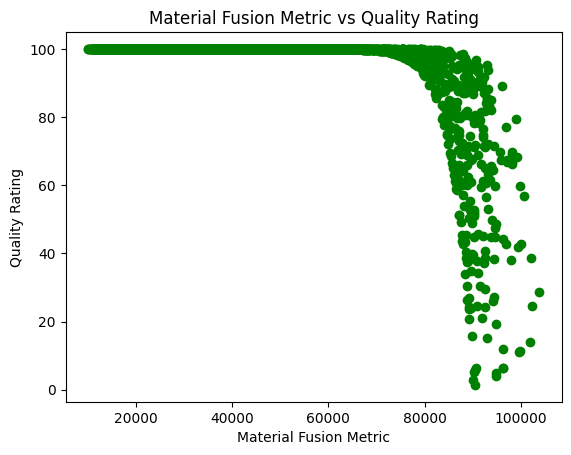

In [39]:
plt.scatter(seniors['Material Fusion Metric'],seniors['Quality Rating'],c='green')
plt.xlabel('Material Fusion Metric')
plt.ylabel('Quality Rating')
plt.title('Material Fusion Metric vs Quality Rating')
plt.show()

**As we see that the Output Quality Rating does not depend linearly on all the feature variables, we should perfrom polynomial**

In [40]:
def normalise(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)  #Performing Z-Score Normalization

In [41]:
x1 = seniors.drop(['Quality Rating'], axis=1).values
y1 = seniors['Quality Rating'].values.reshape(-1, 1)
x1= normalise(x1)
y1=y1.astype(float)

In [42]:
def loss_function(y_true, y_hat):

    loss = np.mean((y_hat - y_true)**2)

    return loss
def calculate_gradients(X, y_true, y_pred):

    num_rows = X.shape[0]

    dw = (1/num_rows)*np.dot(X.T, (y_pred - y_true))


    db = (1/num_rows)*np.sum((y_pred - y_true))

    return dw, db
def create_polynomial_feature_set(X, degrees):

    t = X.copy()


    for i in degrees:
        X = np.append(X, t**i, axis=1)

    return X
def train(X, y, batch_size, degrees, epochs, lr):

    x = create_polynomial_feature_set(X, degrees)


    m, n = x.shape


    w = np.zeros((n,1))
    b = 0


    y = y.reshape(m,1)


    losses = []


    for epoch in range(epochs):
        for i in range((m-1)//batch_size + 1):


            start_i = i*batch_size
            end_i = start_i + batch_size
            x_batch = x[start_i:end_i]
            y_batch = y[start_i:end_i]

            y_hat = np.dot(x_batch, w) + b


            dw, db = calculate_gradients(x_batch, y_batch, y_hat) #Calculating gradients for weights and bias


            w -= lr*dw
            b -= lr*db


        l = loss_function(y, np.dot(x, w) + b)
        losses.append(l)


        if epoch % 1000 == 0:
            print(f"Epoch {epoch} - Loss: {l}")
    return w, b, losses
def predict(X, w, b, degrees):



    x1 = create_polynomial_feature_set(X, degrees)

    return np.dot(x1, w) + b


Epoch 0 - Loss: 3643.4048235451655
Epoch 1000 - Loss: 11.100132603498388
Epoch 2000 - Loss: 10.10853364262078
Epoch 3000 - Loss: 9.754857730756115
Epoch 4000 - Loss: 9.622826623658137
Epoch 5000 - Loss: 9.569158354076206
Epoch 6000 - Loss: 9.543887578403123
Epoch 7000 - Loss: 9.529414072170644
Epoch 8000 - Loss: 9.519415338165519
Epoch 9000 - Loss: 9.511541759967248


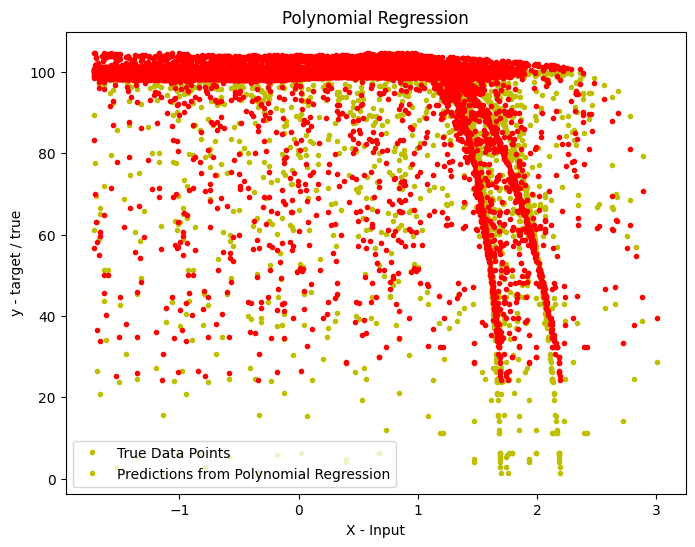

In [43]:
w_trained, b_trained, losses_trained = train(x1, y1, batch_size=100, degrees=[4], epochs=10000,
                lr=0.01)
y_hat = predict(x1, w_trained, b_trained, [4])

# Plotting
fig = plt.figure(figsize=(8,6))

plt.plot(x1, y1, 'y.')

plt.plot(x1, y_hat, 'r.')

plt.legend(["True Data Points", "Predictions from Polynomial Regression"])

plt.xlabel('X - Input')

plt.ylabel('y - target / true')

plt.title('Polynomial Regression')

plt.show()

**Red represents the predivted output while yellow represents the true data**

In [44]:
def r2_score(y, y_hat):

    sse = np.sum((np.array(y_hat)-np.array(y))**2)
    tss = np.sum((np.array(y)-np.mean(np.array(y)))**2)
    return 1 - (sse / tss )

In [45]:
y_pred = predict(x1, w_trained, b_trained, [4])
m=y_pred.shape[0]
for i in range(m):
    if y_pred[i]>100:
        y_pred[i]=100.00 #Setting the predictions which go slightly over 100.00 as 100.00
r2_score(y1, y_pred)

0.9562096875410085

We obtain a very high R2 score of 0.9562096875410085 indicating accuracy

In [46]:
junior_predictions=pd.DataFrame(y_pred,columns=['Predicted Quality Rating'])
junior_predictions.to_csv('juniors_predictions.csv', index=False)
# Storing Output into a .csv file